# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
unit="imperial"

# Build query URL and request your results in F
query_url =  url + "appid=" + weather_api_key + "&q=" + city+ "&units=" + unit

In [5]:
print(requests.get(query_url))

<Response [200]>


In [4]:
# Retrieving data and converting it into JSON
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 5.6325, 'lat': -1.4014},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 81.23,
  'feels_like': 86.76,
  'temp_min': 81.23,
  'temp_max': 81.23,
  'pressure': 1010,
  'humidity': 79,
  'sea_level': 1010,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 14.2, 'deg': 201, 'gust': 14.56},
 'clouds': {'all': 98},
 'dt': 1702266705,
 'sys': {'country': 'GQ', 'sunrise': 1702272280, 'sunset': 1702316198},
 'timezone': 3600,
 'id': 2306774,
 'name': 'San Antonio de Palé',
 'cod': 200}

In [5]:

# Set the API base URL
unit="imperial"
url=f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =  city_weather['dt']

# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | minas de marcona
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | berdigestyakh
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | okhotsk
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | yaren
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | berezovyy
Processing Record 17 of Set 1 | brookings
Processing Record 18 of Set 1 | kelme
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | nieuw amsterdam
Processing Record 21 of Set 1 | dawei
Processing Record 22 of Set 1 | port elizabet

In [6]:
city_data

[{'City': 'stanley',
  'Lat': 54.868,
  'Lng': -1.6985,
  'Max Temp': 39.72,
  'Humidity': 96,
  'Cloudiness': 75,
  'Wind Speed': 8.05,
  'Country': 'GB',
  'Date': 1702266711},
 {'City': 'yellowknife',
  'Lat': 62.456,
  'Lng': -114.3525,
  'Max Temp': 9.41,
  'Humidity': 97,
  'Cloudiness': 75,
  'Wind Speed': 19.57,
  'Country': 'CA',
  'Date': 1702266712},
 {'City': 'minas de marcona',
  'Lat': -15.2119,
  'Lng': -75.1103,
  'Max Temp': 60.26,
  'Humidity': 80,
  'Cloudiness': 93,
  'Wind Speed': 10.02,
  'Country': 'PE',
  'Date': 1702266713},
 {'City': 'puerto natales',
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp': 41.02,
  'Humidity': 89,
  'Cloudiness': 54,
  'Wind Speed': 3.6,
  'Country': 'CL',
  'Date': 1702266670},
 {'City': 'blackmans bay',
  'Lat': -43.0167,
  'Lng': 147.3167,
  'Max Temp': 67.73,
  'Humidity': 60,
  'Cloudiness': 7,
  'Wind Speed': 3,
  'Country': 'AU',
  'Date': 1702266715},
 {'City': 'berdigestyakh',
  'Lat': 62.0989,
  'Lng': 126.6992,
  'Max T

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [8]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,39.72,96,75,8.05,GB,1702266711
1,yellowknife,62.4560,-114.3525,9.41,97,75,19.57,CA,1702266712
2,minas de marcona,-15.2119,-75.1103,60.26,80,93,10.02,PE,1702266713
3,puerto natales,-51.7236,-72.4875,41.02,89,54,3.60,CL,1702266670
4,blackmans bay,-43.0167,147.3167,67.73,60,7,3.00,AU,1702266715
5,berdigestyakh,62.0989,126.6992,-17.32,93,100,10.04,RU,1702266716
6,iqaluit,63.7506,-68.5145,22.73,73,100,24.16,CA,1702266716
7,saldanha,-33.0117,17.9442,57.25,88,0,14.12,ZA,1702266717
8,okhotsk,59.3833,143.3000,18.10,93,100,6.89,RU,1702266718
9,hawaiian paradise park,19.5933,-154.9731,75.04,96,75,0.00,US,1702266719


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



In [10]:
# Read saved data
city_data_df_ = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,39.72,96,75,8.05,GB,1702266711
1,yellowknife,62.4560,-114.3525,9.41,97,75,19.57,CA,1702266712
2,minas de marcona,-15.2119,-75.1103,60.26,80,93,10.02,PE,1702266713
3,puerto natales,-51.7236,-72.4875,41.02,89,54,3.60,CL,1702266670
4,blackmans bay,-43.0167,147.3167,67.73,60,7,3.00,AU,1702266715
5,berdigestyakh,62.0989,126.6992,-17.32,93,100,10.04,RU,1702266716
6,iqaluit,63.7506,-68.5145,22.73,73,100,24.16,CA,1702266716
7,saldanha,-33.0117,17.9442,57.25,88,0,14.12,ZA,1702266717
8,okhotsk,59.3833,143.3000,18.10,93,100,6.89,RU,1702266718
9,hawaiian paradise park,19.5933,-154.9731,75.04,96,75,0.00,US,1702266719


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

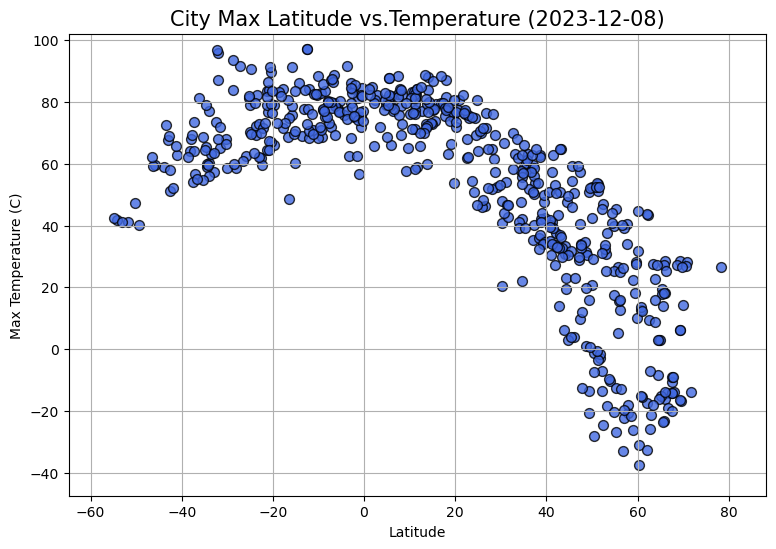

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE:
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', facecolor='royalblue',s=[50],alpha=.80)

# Get today's date and format it
today_date = pd.to_datetime("2023-12-08").date().strftime('%Y-%m-%d')

# Incorporate the other graph properties:
plt.title(f'City Max Latitude vs.Temperature ({today_date})', fontsize=15)


#plt.title('City Latitude vs.Temperature ')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Max Temp'])-10, max(city_data_df['Max Temp'])+5)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-10, max(city_data_df['Lat'])+10)

#set a grid
plt.grid()

# Save the figure:
plt.savefig("output_data/Fig1.png")

# Show plot:
plt.show()


#### Latitude Vs. Humidity

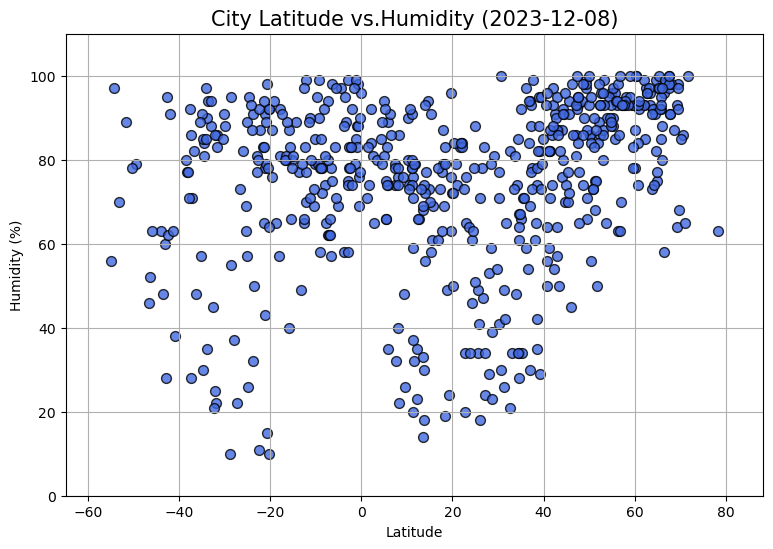

In [12]:
# Build scatter plot for latitude vs. humidity
# YOUR CODE HERE:
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', facecolor='royalblue',s=[50],alpha=.80)

# Get today's date and format it
today_date = pd.to_datetime("2023-12-08").date().strftime('%Y-%m-%d')

# Incorporate the other graph properties:
plt.title(f'City Latitude vs.Humidity ({today_date})', fontsize=15)
#plt.title(f"City Latitude vs. Max Temperature ({today_date})")
#plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.to_datetime('now').date()) + ')', fontsize=20)


plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Humidity'])-10, max(city_data_df['Humidity'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-10, max(city_data_df['Lat'])+10)

#set a grid
plt.grid()

# Save the figure:
plt.savefig("output_data/Fig2.png")

# Show plot:
plt.show()


#### Latitude Vs. Cloudiness

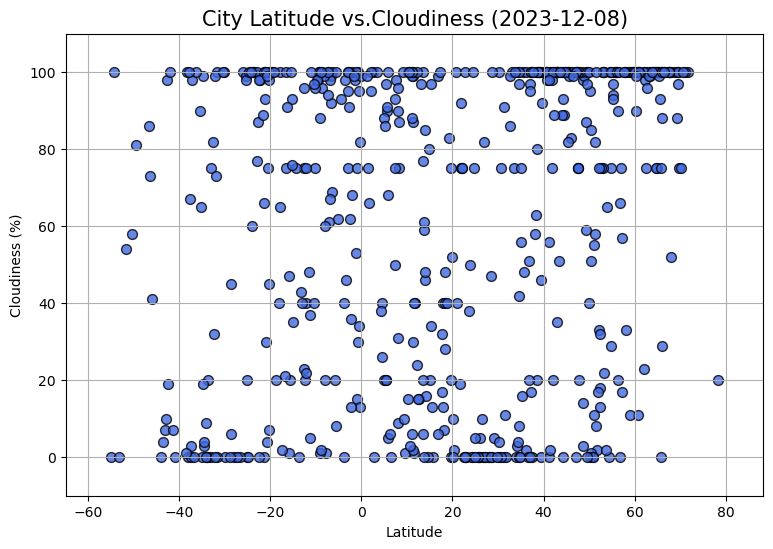

In [32]:
# Build scatter plot for latitude vs. cloudiness
# YOUR CODE HERE:
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', facecolor='royalblue',s=[50],alpha=.80)

# Get today's date and format it
today_date = pd.to_datetime("2023-12-08").date().strftime('%Y-%m-%d')

# Incorporate the other graph properties:
plt.title(f'City Latitude vs.Cloudiness ({today_date})', fontsize=15)
#plt.title(f"City Latitude vs. Max Temperature ({today_date})")
#plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.to_datetime('now').date()) + ')', fontsize=20)


plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Cloudiness'])-10, max(city_data_df['Cloudiness'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-10, max(city_data_df['Lat'])+10)

#set a grid
plt.grid()

# Save the figure:
plt.savefig("output_data/Fig3.png")

# Show plot:
plt.show()

#### Latitude vs. Wind Speed Plot

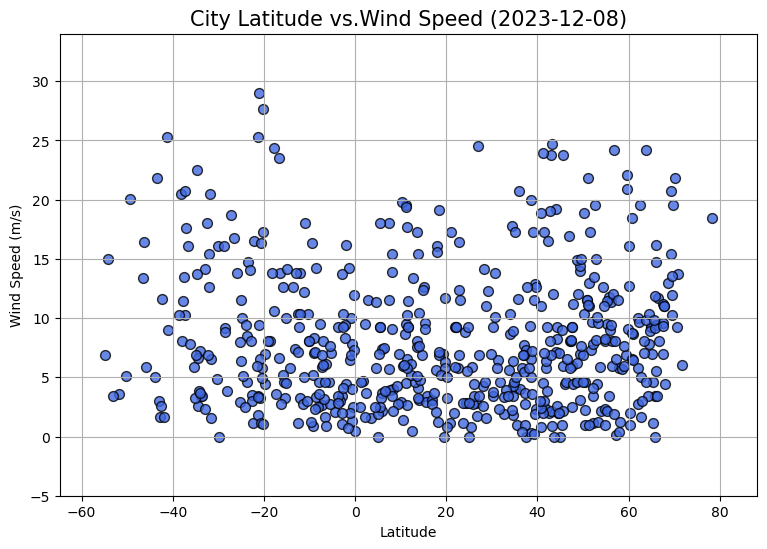

In [14]:
# Build scatter plot for latitude vs. wind speed
# YOUR CODE HERE:
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', facecolor='royalblue',s=[50],alpha=.80)

# Get today's date and format it
today_date = pd.to_datetime("2023-12-08").date().strftime('%Y-%m-%d')

# Incorporate the other graph properties:
plt.title(f'City Latitude vs.Wind Speed ({today_date})', fontsize=15)
#plt.title(f"City Latitude vs. Max Temperature ({today_date})")
#plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.to_datetime('now').date()) + ')', fontsize=20)


plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Wind Speed'])-5, max(city_data_df['Wind Speed'])+5)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-10, max(city_data_df['Lat'])+10)

#set a grid
plt.grid()

# Save the figure:
plt.savefig("output_data/Fig3.png")

# Show plot:
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


###  Temperature vs. Latitude Linear Regression Plot

Nothern Hemisphere

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df_[city_data_df_['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,stanley,54.8680,-1.6985,39.72,96,75,8.05,GB,1702266711
1,1,yellowknife,62.4560,-114.3525,9.41,97,75,19.57,CA,1702266712
5,5,berdigestyakh,62.0989,126.6992,-17.32,93,100,10.04,RU,1702266716
6,6,iqaluit,63.7506,-68.5145,22.73,73,100,24.16,CA,1702266716
8,8,okhotsk,59.3833,143.3000,18.10,93,100,6.89,RU,1702266718


rvalue:-0.842090920766355


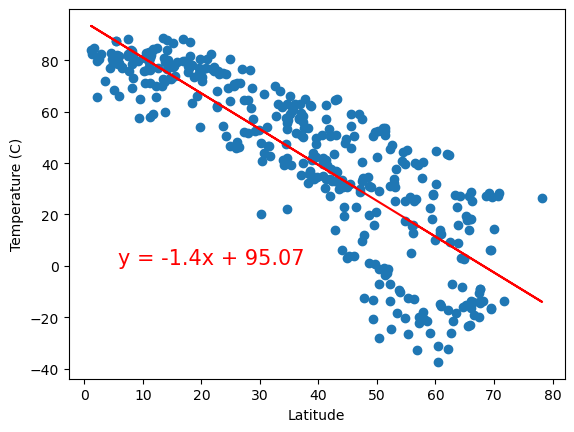

In [16]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
print(f"rvalue:{rvalue}")
plt.show()

Southern Hemisphere

In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df_[city_data_df_['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,minas de marcona,-15.2119,-75.1103,60.26,80,93,10.02,PE,1702266713
3,3,puerto natales,-51.7236,-72.4875,41.02,89,54,3.60,CL,1702266670
4,4,blackmans bay,-43.0167,147.3167,67.73,60,7,3.00,AU,1702266715
7,7,saldanha,-33.0117,17.9442,57.25,88,0,14.12,ZA,1702266717
10,10,yaren,-0.5472,166.9160,84.38,69,34,2.46,NR,1702266720


rvalue:0.5693435225328334


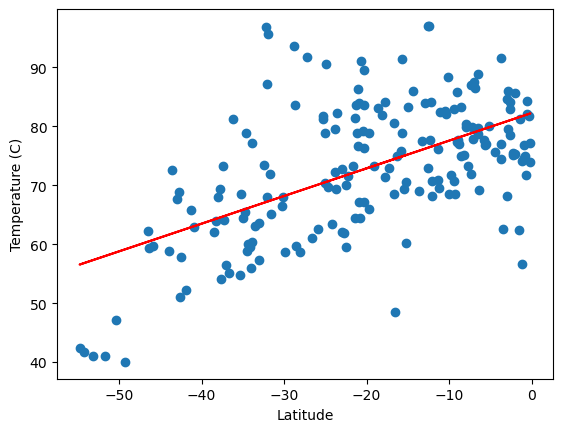

In [18]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
print(f"rvalue:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 

A negative correlation coefficient of -0.842 in the Northern Hemisphere suggests a strong negative correlation. This means that as latitude increases, cloudiness tends to decrease significantly.

A positive correlation coefficient of0.569 in the Southern Hemisphere indicates a moderate positive correlation. This suggests that as latitude increases in the Southern Hemisphere, cloudiness tends to increase moderately.

### Humidity vs. Latitude Linear Regression Plot

rvalue:0.4327417395324414


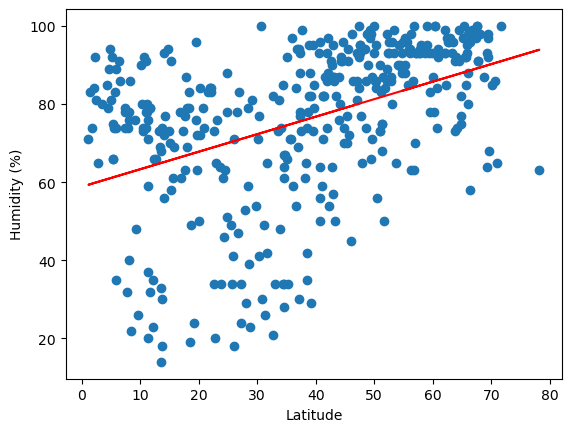

In [19]:
#Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values

# equation line
line_eq11 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq11,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"rvalue:{rvalue}")
plt.show()

rvalue:0.25169652748935495


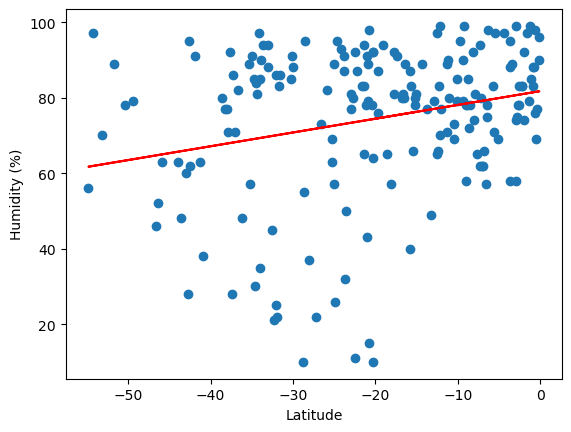

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values =southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
# equation line
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"rvalue:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
In the Northern Hemisphere, where the correlation coefficient is 0.433, it indicates a weak positive correlation. This implies that as latitude increases in the Northern Hemisphere, there is a slight tendency for the humidity to increase as well.

In the Southern Hemisphere, where the correlation coefficient is 0.252, it also suggests a weak positive correlation. This means that as latitude increases in the Southern Hemisphere, there is a modest tendency for for the humidity to increase.

### Cloudiness vs. Latitude Linear Regression Plot

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"Slope:{slope}")
print(f"Intercept:{intercept}")
print(f"rvalue:{rvalue}")
print(f"pvalue:{pvalue}")
print(f"stderr:{stderr}")

Slope:0.6490211126645686
Intercept:38.79390503680942
rvalue:0.3169297296037972
pvalue:1.8721893172529562e-10
stderr:0.09911610456637451


In [22]:
regress_values = x_values * slope + intercept
regress_values

0      74.404395
1      79.329168
5      79.097402
6      80.169390
8      77.334920
         ...    
565    58.170365
567    55.669947
569    54.958165
570    75.871248
572    68.897711
Name: Lat, Length: 386, dtype: float64

rvalue:0.3169297296037972


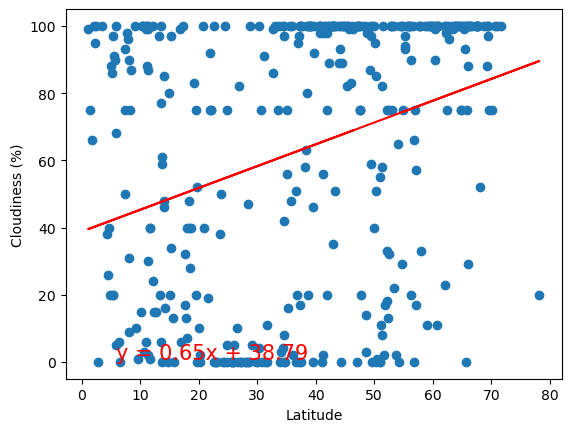

In [23]:
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"rvalue:{rvalue}")
plt.show()

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"Slope:{slope}")
print(f"Intercept:{intercept}")
print(f"rvalue:{rvalue}")
print(f"pvalue:{pvalue}")
print(f"stderr:{stderr}")

Slope:0.7414506392635943
Intercept:73.22098028654472
rvalue:0.25747482294887386
pvalue:0.0003744359210644312
stderr:0.20458173281841308


In [26]:
regress_values = x_values * slope + intercept
regress_values

2      61.942107
3      34.870484
4      41.326221
7      48.744434
10     72.815258
         ...    
558    68.063598
562    45.169456
566    59.089302
568    66.668929
571    58.181915
Name: Lat, Length: 187, dtype: float64

rvalue:0.25747482294887386


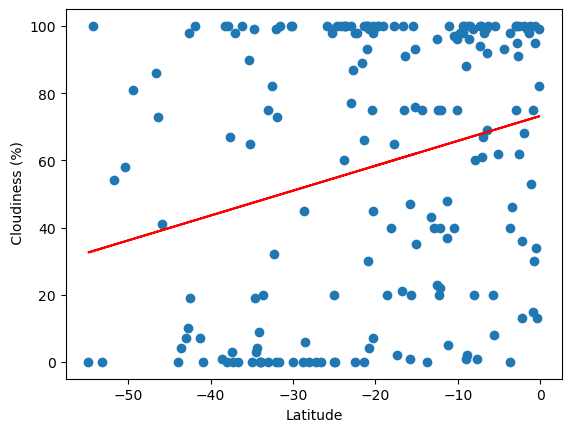

In [27]:
# equation line
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq7,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Cloudiness (%)')
print(f"rvalue:{rvalue}")
plt.show()

**Discussion about the linear relationship:**

In the Northern Hemisphere, where the correlation coefficient is positive (0.316), it suggests a weak positive correlation. As latitude increases, cloudiness tends to increase slightly.

In the Southern Hemisphere, where the correlation coefficient is also positive (0.257), it indicates a weak positive correlation. However, the correlation is weaker than in the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"Slope:{slope}")
print(f"Intercept:{intercept}")
print(f"rvalue:{rvalue}")
print(f"pvalue:{pvalue}")
print(f"stderr:{stderr}")

Slope:0.045460264779793
Intercept:6.135156391292693
rvalue:0.1600556563422444
pvalue:0.0016063116423998037
stderr:0.014307375978921287


In [29]:
regress_values = x_values * slope + intercept
regress_values

0      8.629470
1      8.974423
5      8.958189
6      9.033276
8      8.834737
         ...   
565    7.492368
567    7.317228
569    7.267372
570    8.732215
572    8.243758
Name: Lat, Length: 386, dtype: float64

rvalue:0.1600556563422444


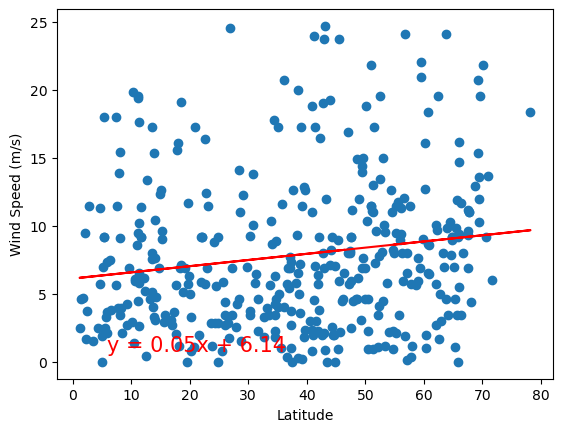

In [30]:
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"rvalue:{rvalue}")
plt.show()

rvalue:-0.23186461508275694


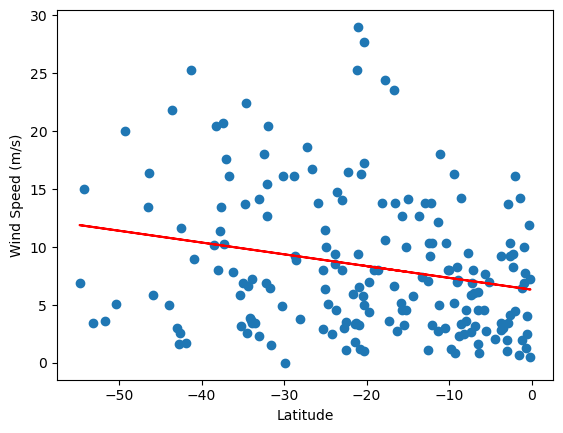

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"rvalue:{rvalue}")
plt.show()

**Discussion about the linear relationship:**

In the Northern Hemisphere, where the correlation coefficient is positive (0.160), it suggests a weak positive correlation. This means that as latitude increases in the Northern Hemisphere, there is a slight tendency for wind speed to increase. 

In the Southern Hemisphere, where the correlation coefficient is negative (-0.231), it suggests a weak negative correlation. This implies that as latitude increases in the Southern Hemisphere, there is a slight tendency for wind speed to decrease. 

